
# Project: [TMDB-MOVIE-DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Movies has always beeen one of the best forms of entertainment because they offer something for everyone. This range from intense, dramatic, comedy, action, and so much more. Whether you're feeling up or down, there's always something for everyone.

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset contains 21 columns 10866 rows. We will be performing an exploratory analysis on the dataset. we will be exploring the data and answering questions which includes; what genres are the most popular, what levels of popularity received the highest rating, and we will also be exploring the data to check the relationship between variables.


### Import Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [69]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [70]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [71]:
df.shape

(10866, 21)

There are 10866 rows and 21 columns in this dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the info above, we can tell that cast, homepage, tagline, keywords, overview, genres, and production_companies
have missing values

In [73]:
#checking the sum of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Isnull further shows the amount of missing values. There are two ways to treat missung values; either by filling them or
dropping them. Going further to explore the data, we will kknow which option to go with.

In [74]:
#checking the amount of unique values in a dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The above shows the amount of unique values in each columns 

In [75]:
#checking  for duplicates in Movie title
dup_title = df[df["original_title"].duplicated() == True]
dup_title['original_title'].index

Int64Index([ 1133,  1194,  1349,  1440,  1513,  1707,  1753,  1757,  1865,
             2036,
            ...
            10757, 10759, 10767, 10795, 10799, 10818, 10827, 10849, 10853,
            10854],
           dtype='int64', length=295)

The above code shows that there are 295 duplicates data in our dataset And we will be removing all duplicate title in the original_title dataset. This will be done in the data cleaning session.


### Data Cleaning
Following our steps above, we can see that there data cleaning is requiredd in the dataset,which includes; dropping of nan values, removal of duplicate data e.t.c.

We are going to build a wrangle function to input all our cleaning. 


In [76]:
#build a wrangle function

def wrangle(filepath):
    #read csv file
    df = pd.read_csv(filepath)
    
    #drop unwanted columns
    df.drop(columns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies' ], inplace = True)
    
    #Drop title Duplicates 
    df_dup = df.drop_duplicates('original_title', inplace = True)
    
    #Drop Nan values
    drop_genre_na = df.dropna(subset = ['genres'], inplace = True)
    
    #split and subset to the first index
    df['genre'] = df["genres"].str.split("|", expand = True)[0]

    #Drop genres column
    df.drop(columns = 'genres', inplace = True)
 
    return df
    

Inside our WRANGLE FUNCTION,  the following was done to clean the data;

1. All unwanted columns which includes 'id', 'imdb_id', 'homepage', 'tagline', 'keywords',  and 'overview'  was dropped.
2. All duplicate title in the original_title was dropped
3. All empty cell in the genre column was dropped.
4. The 'genres' column was split and a new column named 'genre' was created and the old column 'genres' was dropped

In [77]:
#Loading the clean Data in the wrangle function
df = wrangle('tmdb-movies.csv')
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [78]:
df.shape

(10548, 14)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10548 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10548 non-null float64
budget            10548 non-null int64
revenue           10548 non-null int64
original_title    10548 non-null object
cast              10475 non-null object
director          10507 non-null object
runtime           10548 non-null int64
release_date      10548 non-null object
vote_count        10548 non-null int64
vote_average      10548 non-null float64
release_year      10548 non-null int64
budget_adj        10548 non-null float64
revenue_adj       10548 non-null float64
genre             10548 non-null object
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [80]:
#checking  for duplicates in Movie title
dup_title = df[df["original_title"].duplicated() == True]
dup_title['original_title'].index

Int64Index([], dtype='int64')

After cleaning, There are 10548 rows and 14 columns remaining in the dataset, and there are no duplicate titles in the
'original_title' dataset.

### Summary Statistics of movies dataset

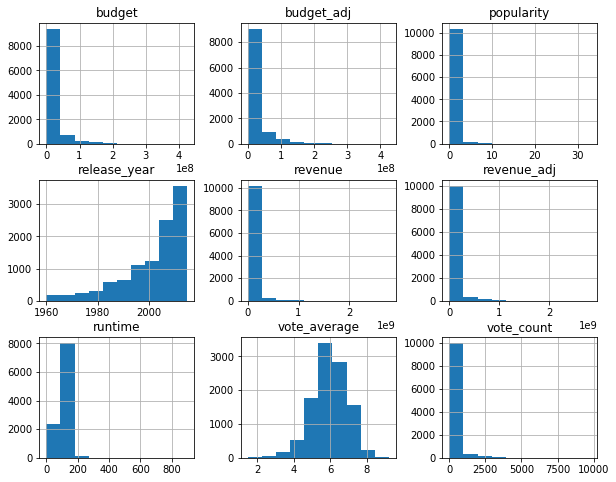

In [81]:
df.hist(figsize=(10,8));

From the histogram above, we can seefrom the 'release_year' that movies were release most in the year 2015. and 'vote_average' appears to be closer to a normal distribution


In [82]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10548.000000,1.054800e+04,1.054800e+04,10548.000000,10548.000000,10548.000000,10548.000000,1.054800e+04,1.054800e+04
mean,0.649027,1.479945e+07,4.017399e+07,101.898369,219.320440,5.967965,2001.635002,1.765650e+07,5.128319e+07
std,1.008401,3.116716e+07,1.175987e+08,30.253258,580.362722,0.937372,12.594811,3.448349e+07,1.446210e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207371,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384765,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715897,1.600000e+07,2.418657e+07,111.000000,148.000000,6.600000,2011.000000,2.099042e+07,3.368783e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Relationship Between Variables

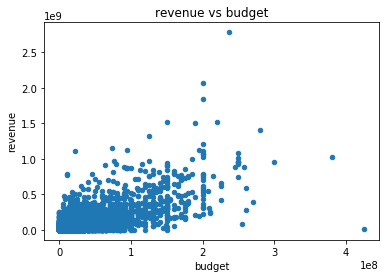

In [83]:
df.plot(x = "budget", y = "revenue", kind = "scatter", title = 'revenue vs budget') ;

We can say that budget(investment) affects returns(investment) positively

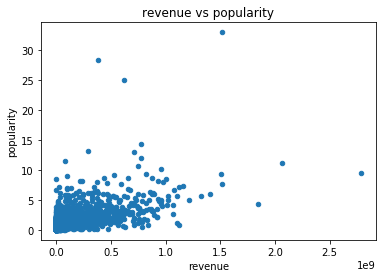

In [84]:
df.plot(x = "revenue", y = "popularity", kind = 'scatter', title = 'revenue vs popularity');


The above shows a slight increase in popularity as revenue increases

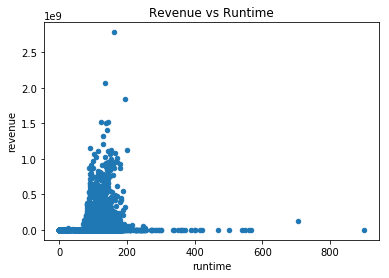

In [85]:
df.plot(x = "runtime", y = "revenue", kind = "scatter", title = 'Revenue vs Runtime');

This shows that movies with runtime close to 150 minutes will possibly produce Higher returns('revenue')

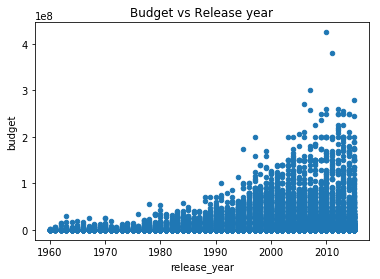

In [86]:
df.plot(x = "release_year", y = "budget", kind = "scatter", title = "Budget vs Release year");

This shows that the cost of movies increased with respect to year

###  What level of popularity receives the highest average rating?

In [87]:
df['popularity'].describe()


count    10548.000000
mean         0.649027
std          1.008401
min          0.000065
25%          0.207371
50%          0.384765
75%          0.715897
max         32.985763
Name: popularity, dtype: float64

In [88]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.000065 , 0.207371, 0.384765, 0.715897, 32.985763] 
# Fill in this list with five values you just found

In [89]:
bin_names = ["low", "medium",  "moderate_high","high"]


In [90]:
df['popularity_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,popularity_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,high
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,high
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,high


In [91]:
df.groupby('popularity_levels').mean()['vote_average']

popularity_levels
low              5.896094
medium           5.798142
moderate_high    5.900341
high             6.277285
Name: vote_average, dtype: float64

This shows that Movies with high rating have high vote_average

### Do low runtime have the highest revenue?

In [92]:
df['runtime'].describe()

count    10548.000000
mean       101.898369
std         30.253258
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [93]:
low_runtime = df.query("runtime < 99")
high_runtime = df.query("runtime >=  99")

# ensure these queries included each sample exactly once
runtime_samples = df.shape[0]
runtime_samples == low_runtime['runtime'].count() + high_runtime['runtime'].count() # should be True

True

In [94]:
low_runtime.mean()['revenue']

19215792.030511059

In [95]:
high_runtime.mean()['revenue']

60895096.031108595

No, low runtime do not receive high revenue

### What genre is most popular?

In [96]:

df1 = df.groupby('genre').sum()['popularity']
df1 = pd.DataFrame(df1)
df1['genre'] = df1.index


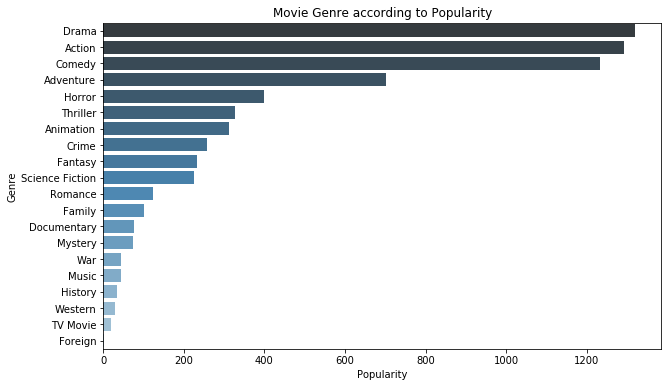

In [97]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'popularity', y = 'genre', 
            data = df1, 
            palette = "Blues_d", 
            order = df1.sort_values('popularity',ascending = False).genre)
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.title('Movie Genre according to Popularity') ;

from the above analysis, we can conclude that Drama is the most popular Genre

### What Genre has the highest Revenue?

In [98]:
df1 = df.groupby('genre').sum()['revenue']
df1 = pd.DataFrame(df1)
df1['genre'] = df1.index


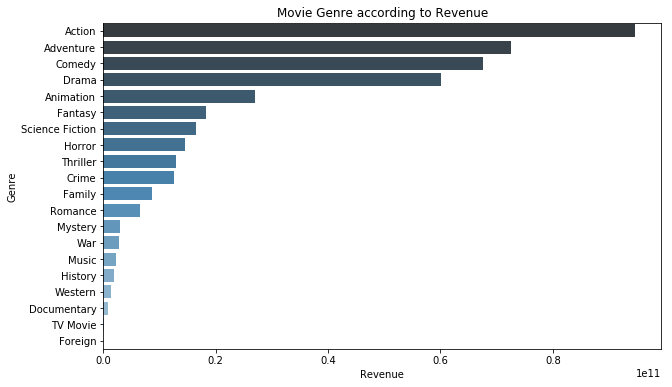

In [99]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'revenue', y = 'genre', 
            data = df1, 
            palette = "Blues_d", 
            order = df1.sort_values('revenue',ascending = False).genre)
plt.xlabel('Revenue')
plt.ylabel('Genre')
plt.title('Movie Genre according to Revenue') ;

<a id='conclusions'></a>
## Conclusions

>Firstly, I carried out a summary statistics of the dataset. I found out that most movies in the data set were released in the year 2015 and most of the movies have an average runtime of 110 minutes. Furthermore, I performed an exploratory analysis checking on the relationship between variables using the scatter plot, It was clear that a high budget produces high revenue. Also, it was clear that movies with a runtime between 100 to 180 minutes produce high revenue.
After that, I analyzed the level of popularity that receives the highest ratings and found out that high popularity receives high ratings.  I also found out that low runtime produces low revenues.
Lastly, I ran an analysis on the most popular genre according to popularity and revenue and it showed  ‘Drama’ as the most popular and ‘Action’ as the genre with the highest revenue. 


<a id='Limitations'></a>
## Limitations 



>I noticed every movie has more than one genre so I was confused at first as to what index in the genre I needed to use but I ended up using the first row in the genre.




In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0